In [1]:
import numpy as np
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

In [19]:
X, y = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0, class_sep=3)
X += np.random.randn(500, 2)
X_b = np.c_[np.ones((500, 1)), X]
y[y == 0] = -1

In [ ]:
weights = np.random.randn(3, 1)
t = 1000
eta_0 = 500
C = 0.01
epochs = 3000
errors = []
b_error = float('inf')
b_weights = np.NaN
for epoch in range(epochs):
    eta = t / (epoch + eta_0)
    hinge_error = 0
    grad = np.zeros((3, 1))
    for point, target in zip(X_b, y):
        hinge_error += C * max(0, (1 - point.dot(weights) * target)) + weights.T.dot(weights) / 2
        #hinge_error += C * max(0, (1 - point.dot(weights) * target))
        grad += (weights - C * point.reshape(-1, 1) * target) if point.dot(weights) * target < 1 else weights
        #grad += (- C * point.reshape(-1, 1) * target) if point.dot(weights) * target < 1 else 0
    if hinge_error < b_error:
        b_error = hinge_error
        b_weights = weights.copy()
    errors.append(hinge_error)
    weights -= eta * grad / X_b.shape[0]
    print(f"Epoch: {epoch} --- Error: {hinge_error / X_b.shape[0]}")

(-7.0, 7.0, -6.0, 6.0)

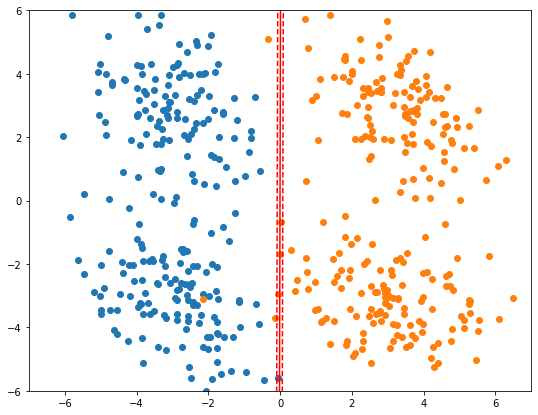

In [29]:
plt.figure(figsize=(9, 7))
dec_boun = np.linspace(-7, 7, 100)

#margin = 1 / np.sqrt(weights.T.dot(weights))
margin_b = 1 / np.sqrt(b_weights.T.dot(b_weights))


y_dec_boun = -(weights[1, 0] * dec_boun + weights[0, 0]) / weights[2, 0]
y_dec_boun_b = -(b_weights[1, 0] * dec_boun + b_weights[0, 0]) / b_weights[2, 0]

plt.scatter(X[y==-1][:, 0], X[y==-1][:, 1])
plt.scatter(X[y==1][:, 0], X[y==1][:, 1])
#plt.plot(dec_boun, y_dec_boun - margin.flatten(), 'k--')
#plt.plot(dec_boun, y_dec_boun + margin.flatten(), 'k--')
#plt.plot(dec_boun, y_dec_boun, 'k')

plt.plot(dec_boun, y_dec_boun_b - margin_b.flatten(), 'r--')
plt.plot(dec_boun, y_dec_boun_b + margin_b.flatten(), 'r--')
plt.plot(dec_boun, y_dec_boun_b, 'r')
plt.axis([-7, 7, -6, 6])